The dataset contains 4242 images of flowers. All images are divided into 5 classes:

1. Daisy<br>
2. Dandelion<br>
3. Rose<br>
4. Sunflower<br>
5. Tulip<br>

#### You are asked to train a CNN model with using fastai cnn_learner, visualize results, predict random training images.

In [1]:
from fastai.vision.all import *

data_dir = r'C:\Users\Administrator\Desktop\DSA_Bootcamp26\Week 11\Python\HW_CS\flowers (W11D2_HW)'

In [2]:
data = ImageDataLoaders.from_folder(data_dir, train='.', valid_pct=0.2, item_tfms=Resize(460), 
                                    batch_tfms=[*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)])

C:\ProgramData\anaconda3\Lib\site-packages\fastai\data\transforms.py:225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(col):


In [5]:
learn = cnn_learner(data, resnet34, metrics=[accuracy, error_rate])
learn

C:\ProgramData\anaconda3\Lib\site-packages\fastai\vision\learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Administrator/.cache\torch\hub\che

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.039001,0.324842,0.893519,0.106481,1:01:10


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.455806,0.266222,0.912037,0.087963,26:10
1,0.316165,0.254299,0.928241,0.071759,24:37
2,0.202105,0.238927,0.943287,0.056713,43:02
3,0.126762,0.230973,0.939815,0.060185,34:53
4,0.082126,0.230442,0.942130,0.057870,20:09


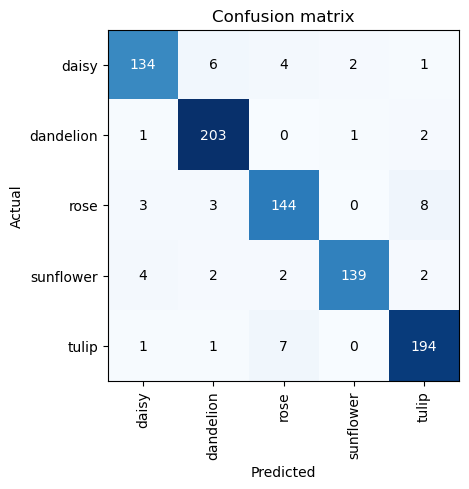

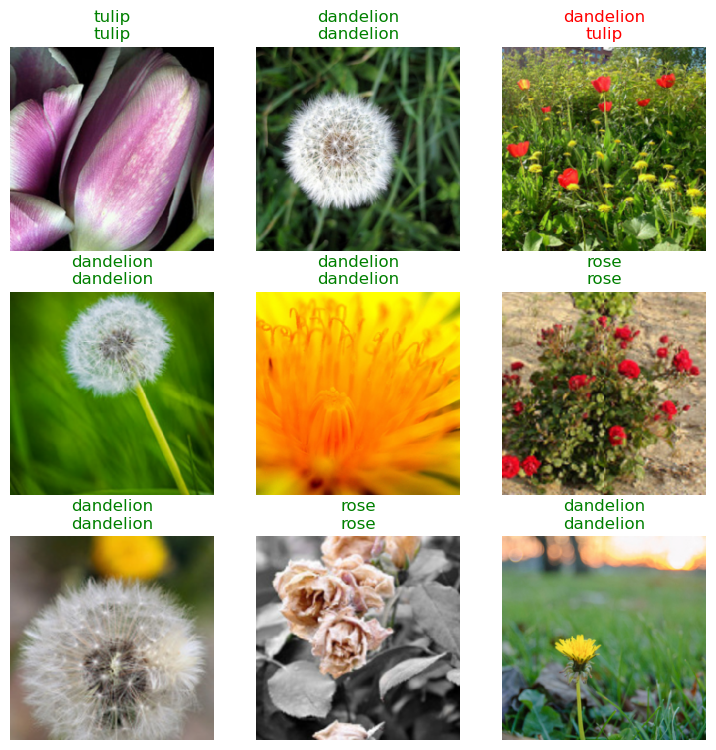

In [6]:
learn.fine_tune(5)

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

learn.show_results()